In [223]:
import matplotlib.pyplot as plt
import math

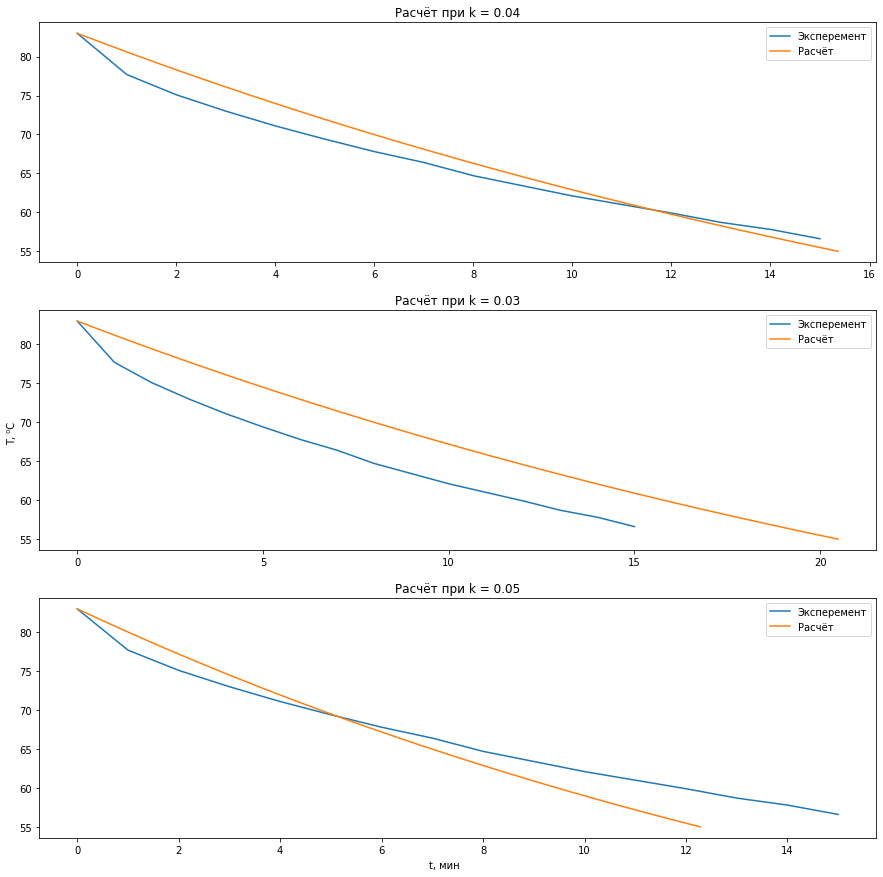

In [224]:
def newtonLawFun(TRoom, TBreak, T0, timeStep, alpha):
    timeArr = [0];
    TArr = [T0];
    index = 0;

    while TBreak < TArr[index]:
        timeArr.append(timeArr[index] + timeStep);
        TArr.append(TArr[index] - timeStep * alpha * (TArr[index] - TRoom));
        index += 1;
        

    return (timeArr, TArr);

def getAnalyticalT(TRoom, T0, alpha, t):
    return TRoom - math.exp(-alpha * t) * (TRoom - T0);

def main():
    timeArrExperimental = [i for i in range(16)];
    TArrExperimental = [83.0, 77.7, 75.1, 73.0, 71.1, 69.4, 67.8, 66.4, 64.7, 63.4, 62.1, 61.0, 59.9, 58.7, 57.8, 56.6];
    

    timeArr, TArr = newtonLawFun(22.0, 55, 83.0, 1/60, 0.04);
    timeArr1, TArr1 = newtonLawFun(22.0, 55, 83.0, 1/60, 0.03);
    timeArr2, TArr2 = newtonLawFun(22.0, 55, 83.0, 1/60, 0.05);

    fig = plt.figure(figsize=(15,15));    
    fig.text(0.5, 0.1, 't, мин', ha='center', va='center');
    fig.text(0.1, 0.5, 'T, ⁰С', ha='center', va='center', rotation='vertical');

    ax_1 = fig.add_subplot(3, 1, 1)
    ax_2 = fig.add_subplot(3, 1, 2)
    ax_3 = fig.add_subplot(3, 1, 3) 

    ax_1.plot(timeArrExperimental, TArrExperimental);
    ax_1.plot(timeArr, TArr);
    ax_1.set_title("Расчёт при k = 0.04")
    ax_1.legend(['Эксперемент','Расчёт'], loc=1);

    ax_2.plot(timeArrExperimental, TArrExperimental);
    ax_2.plot(timeArr1, TArr1);
    ax_2.set_title("Расчёт при k = 0.03")
    ax_2.legend(['Эксперемент','Расчёт'], loc=1);

    ax_3.plot(timeArrExperimental, TArrExperimental);
    ax_3.plot(timeArr2, TArr2);
    ax_3.set_title("Расчёт при k = 0.05")
    ax_3.legend(['Эксперемент','Расчёт'], loc=1);

    return 0;

main();    

In [225]:
def main():

    timeArr = [0];
    TArr = [83];

    timeArr1, TArr1 = newtonLawFun(22.0, 22.0 + 61 / 2, 83.0, 1 / 60, 0.04);
    timeArr.append(timeArr1.pop());
    TArr.append(TArr1.pop());
    timeArr1, TArr1 = newtonLawFun(22.0, 22.0 + 61 / 4, 83.0, 1 / 60, 0.04);
    timeArr.append(timeArr1.pop());
    TArr.append(TArr1.pop());
    timeArr1, TArr1 = newtonLawFun(22.0, 22.0 + 61 / 8, 83.0, 1 / 60, 0.04);
    timeArr.append(timeArr1.pop());
    TArr.append(TArr1.pop());
    
    print(timeArr);
    print(TArr);

    deltaTArr = [];
    for element in TArr:
        deltaTArr.append(element - 22);
    print(deltaTArr);

    TAnalytical = [];
    for element in timeArr:
        TAnalytical.append(getAnalyticalT(22, 83, 0.04, element));
    print(TAnalytical);

    return 0;

main();  

[0, 17.33333333333363, 34.64999999999932, 51.983333333331665]
[83, 52.48727297321904, 37.24744058897579, 29.620539071787665]
[61, 30.487272973219042, 15.247440588975792, 7.620539071787665]
[83.0, 52.49432286883455, 37.25448966783816, 29.62582513328494]


0.34999999999999876


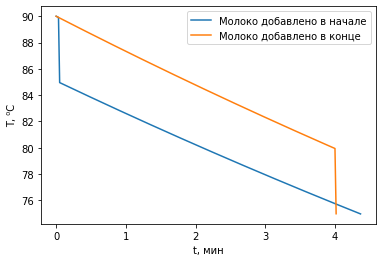

In [226]:
def newtonLawFunWithSkip(TRoom, TBreak, TSkip, T0, timeStep, alpha):
    timeArr = [0];
    TArr = [T0];
    index = 0;
    bSkip = False;

    while TBreak < TArr[index]:
        timeArr.append(timeArr[index] + timeStep);
        TArr.append(TArr[index] - timeStep * alpha * (TArr[index] - TRoom));
        index += 1;
        if bSkip != True and TArr[index - 1] < TSkip:
            bSkip = True;
            timeArr.append(timeArr[index] + timeStep);
            TArr.append(TArr[index - 1] - 5);
            index += 1;


    return (timeArr, TArr);

def main():
    
    timeArr1, TArr1 = newtonLawFunWithSkip(22.0, 75, 90.0, 90.0, 1 / 60, 0.04);
    plt.plot(timeArr1, TArr1);

    timeArr2, TArr2 = newtonLawFunWithSkip(22.0, 75, 80.0, 90.0, 1 / 60, 0.04);
    plt.plot(timeArr2, TArr2);

    plt.legend(['Молоко добавлено в начале','Молоко добавлено в конце'], loc=1);
    plt.xlabel('t, мин');
    plt.ylabel('T, ⁰С');
    print(timeArr1.pop() - timeArr2.pop())

    return 0;

main();

80.60815578829171
[0.005, 0.01, 0.025, 0.05, 0.1]
[80.60792132487515, 80.60768679985365, 80.60698285488452, 80.60580837860691, 80.36904096453675]
[0.00023446341656097047, 0.00046898843805820434, 0.0011729334071901576, 0.00234740968480196, 0.23911482375496007]


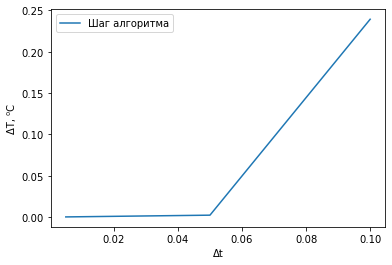

In [227]:
def newtonLawFunWithTime(TRoom, T0, timeStep, timeBreak, alpha):
    timeArr = [0];
    TArr = [T0];
    index = 0;

    while timeArr[index] < timeBreak:
        timeArr.append(timeArr[index] + timeStep);
        TArr.append(TArr[index] - timeStep * alpha * (TArr[index] - TRoom));
        index += 1;

    return (timeArr, TArr);

def main():
    TExp = getAnalyticalT(22.0, 83.0, 0.04, 1);
    timeSteps = [0.005, 0.01, 0.025, 0.05, 0.1];
    deltaTArr = [];
    currentTArr = [];  

    for timeStep in timeSteps:
        timeArr, TArr = newtonLawFunWithTime(22.0, 83.0, timeStep, 1, 0.04);
        T = TArr.pop();
        currentTArr.append(T);
        deltaTArr.append(math.fabs(T - TExp));
    
    print(TExp);
    print(timeSteps);
    print(currentTArr);
    print(deltaTArr);
    plt.plot(timeSteps, deltaTArr);
    plt.legend(['Шаг алгоритма'], loc=2);
    plt.xlabel('Δt');
    plt.ylabel('ΔT, ⁰С');

    return 0;

main(); 

In [228]:
def main():
    timeBreak = 1;
    alpha = 0.04;
    TExp = getAnalyticalT(22.0, 83.0, alpha, timeBreak);
    timeSteps = [0.005, 0.01, 0.025, 0.05, 0.1];
    deltaTArr = [];
    currentTArr = [];
    observationalErr = [];
    

    for timeStep in timeSteps:
        timeArr, TArr = newtonLawFunWithTime(22.0, 83.0, timeStep, timeBreak, alpha);
        T = TArr.pop();
        currentTArr.append(T);
        deltaTArr.append(math.fabs(T - TExp));
        observationalErr.append(math.fabs(T - TExp) / TExp);

    print(TExp);
    print(currentTArr);
    print(deltaTArr);
    print(observationalErr);
    print(" ");

    currentTArr.clear();
    deltaTArr.clear();
    observationalErr.clear();


    timeBreak = 5;
    TExp = getAnalyticalT(22.0, 83.0, alpha, timeBreak);
    

    for timeStep in timeSteps:
        timeArr, TArr = newtonLawFunWithTime(22.0, 83.0, timeStep, timeBreak, alpha);
        T = TArr.pop();
        currentTArr.append(T);
        deltaTArr.append(math.fabs(T - TExp));
        observationalErr.append(math.fabs(T - TExp) / TExp);

    print(TExp);
    print(currentTArr);
    print(deltaTArr);
    print(observationalErr);

    return 0;

main(); 

80.60815578829171
[80.60792132487515, 80.60768679985365, 80.60698285488452, 80.60580837860691, 80.36904096453675]
[0.00023446341656097047, 0.00046898843805820434, 0.0011729334071901576, 0.00234740968480196, 0.23911482375496007]
[2.908681066674722e-06, 5.818126385250023e-06, 1.4551051264226113e-05, 2.912124290459105e-05, 0.0029663849943790846]
 
71.94257593775689
[71.93158864763652, 71.92060151071684, 71.93757859819678, 71.83270993582211, 71.72285929327711]
[0.010987290120368698, 0.021974427040049704, 0.004997339560105729, 0.10986600193477614, 0.21971664447977446]
[0.0001527230569263277, 0.00030544398436694133, 6.946289446779492e-05, 0.0015271346695985664, 0.003054055844064694]
